In [1]:
import sys
# adding search_optimization_tools to the system path
sys.path.insert(0, '../')

In [2]:
from search_optimization_tools.algorithms.trajectory_based import SimulatedAnnealing
from search_optimization_tools.problems import TSP
import matplotlib.pyplot as plt

In [3]:
berlin52_tsp_url = 'https://raw.githubusercontent.com/coin-or/jorlib/b3a41ce773e9b3b5b73c149d4c06097ea1511680/jorlib-core/src/test/resources/tspLib/tsp/berlin52.tsp'
# berlin52_dists = TSP.eval_distances_from_cities(TSP.load_tsp_from_url(berlin52_tsp_url))
# berlin52_tsp_1 = TSP(dists=berlin52_dists, gen_method='reverse', rand_len=True, init_method='greedy')
# berlin52_tsp_5 = TSP(dists=berlin52_dists, gen_method='reverse', rev_len=5, init_method='greedy')
# berlin52_tsp_10 = TSP(dists=berlin52_dists, gen_method='reverse', rev_len=10, init_method='greedy')
# berlin52_tsp_15 = TSP(dists=berlin52_dists, gen_method='reverse', rev_len=15, init_method='greedy')
berlin52_tsp_1 = TSP(load_tsp_url=berlin52_tsp_url, gen_method='random_swap', num_swaps=1, swap_wind = 1, init_method='greedy')
berlin52_tsp_5 = TSP(load_tsp_url=berlin52_tsp_url, gen_method='random_swap', num_swaps=5, swap_wind = 1, init_method='greedy')
berlin52_tsp_10 = TSP(load_tsp_url=berlin52_tsp_url, gen_method='random_swap', num_swaps=10, swap_wind = 1, init_method='greedy')
berlin52_tsp_15 = TSP(load_tsp_url=berlin52_tsp_url, gen_method='random_swap', num_swaps=15, swap_wind = 1, init_method='greedy')

In [4]:
sa_1  = SimulatedAnnealing(max_iter=80, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)
sa_5  = SimulatedAnnealing(max_iter=80, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)
sa_10 = SimulatedAnnealing(max_iter=80, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)
sa_15 = SimulatedAnnealing(max_iter=80, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='geometric', cooling_alpha=0.85)

In [5]:
sols = {
    'sa_1': [0] * (sa_1.max_iter * sa_1.max_iter_per_temp + 1),
    'sa_5': [0] * (sa_5.max_iter * sa_5.max_iter_per_temp + 1),
    'sa_10': [0] * (sa_10.max_iter * sa_10.max_iter_per_temp + 1),
    'sa_15': [0] * (sa_15.max_iter * sa_15.max_iter_per_temp + 1),
}

In [6]:
sa_1.init_annealing(berlin52_tsp_1)
sa_5.init_annealing(berlin52_tsp_5)
sa_10.init_annealing(berlin52_tsp_10)
sa_15.init_annealing(berlin52_tsp_15)
print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_1.val_cur,sa_1.t,sa_1.iter))
print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_5.val_cur,sa_5.t,sa_5.iter))
print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_10.val_cur,sa_10.t,sa_10.iter))
print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_15.val_cur,sa_15.t,sa_15.iter))
print()
sols['sa_1'][0] = sa_1.val_cur
sols['sa_5'][0] = sa_5.val_cur
sols['sa_10'][0] = sa_10.val_cur
sols['sa_15'][0] = sa_15.val_cur
while sa_1.t > sa_1.final_temp and sa_1.iter <= sa_1.max_iter:
    for j in range(sa_1.max_iter_per_temp):
        sa_1.annealing_step()
        sa_5.annealing_step()
        sa_10.annealing_step()
        sa_15.annealing_step()
        sols['sa_1'][sa_1.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_1.val_cur
        sols['sa_5'][sa_5.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_5.val_cur
        sols['sa_10'][sa_10.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_10.val_cur
        sols['sa_15'][sa_15.max_iter_per_temp * (sa_1.iter - 1) + j + 1] = sa_15.val_cur
    
        if sa_1.max_iter_per_temp * (sa_1.iter - 1) + j + 1 % 10000 == 0:
            print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_1.val_best,sa_1.t,sa_1.iter))
            print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_5.val_best,sa_5.t,sa_5.iter))
            print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_10.val_best,sa_10.t,sa_10.iter))
            print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_15.val_best,sa_15.t,sa_15.iter))
            print()

    sa_1.update_temperature()
    sa_5.update_temperature()
    sa_10.update_temperature()
    sa_15.update_temperature()
    sa_1.iter += 1
    sa_5.iter += 1
    sa_10.iter += 1
    sa_15.iter += 1


print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_1.val_best,sa_1.t,sa_1.iter))
print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_5.val_best,sa_5.t,sa_5.iter))
print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_10.val_best,sa_10.t,sa_10.iter))
print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%d" %(sa_15.val_best,sa_15.t,sa_15.iter))


1:  eval_sol=9162.86654590944, cur_temp=10000.000000, cur_iter=1
5:  eval_sol=9162.86654590944, cur_temp=10000.000000, cur_iter=1
10: eval_sol=9162.86654590944, cur_temp=10000.000000, cur_iter=1
15: eval_sol=9162.86654590944, cur_temp=10000.000000, cur_iter=1

1:  eval_sol=9238.034685393297, cur_temp=0.097441, cur_iter=72
5:  eval_sol=9446.860815791642, cur_temp=0.097441, cur_iter=72
10: eval_sol=11615.484076649034, cur_temp=0.097441, cur_iter=72
15: eval_sol=11491.634080717833, cur_temp=0.097441, cur_iter=72


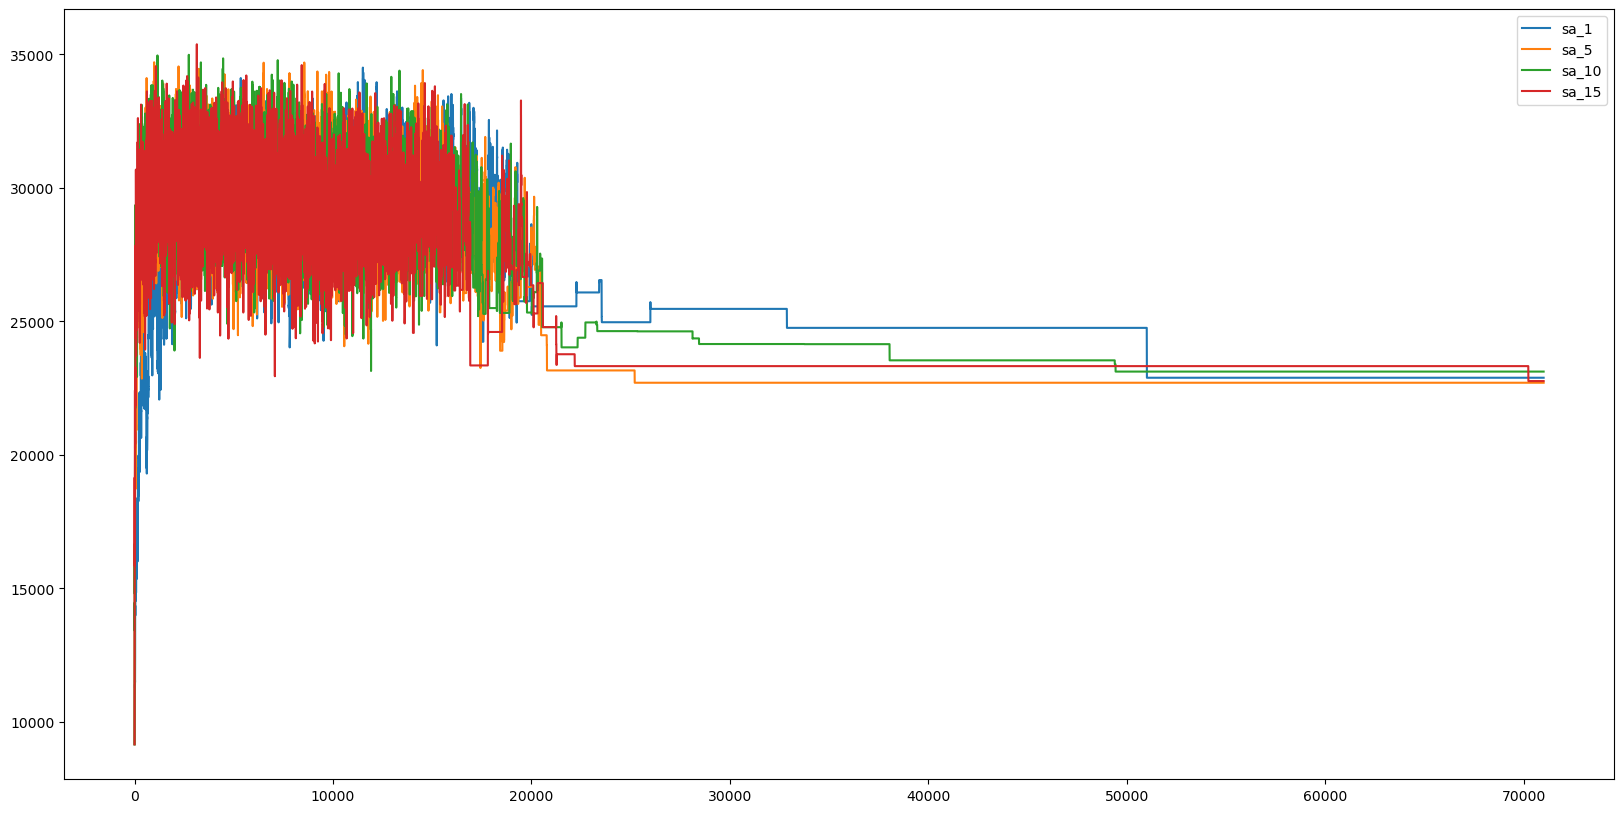

In [7]:
plt.figure(figsize=[20, 10])
plt.plot(sols['sa_1'][:sa_1.max_iter_per_temp * (sa_1.iter - 1) +1])
plt.plot(sols['sa_5'][:sa_5.max_iter_per_temp * (sa_1.iter - 1)  +1])
plt.plot(sols['sa_10'][:sa_10.max_iter_per_temp * (sa_1.iter - 1) +1])
plt.plot(sols['sa_15'][:sa_15.max_iter_per_temp * (sa_1.iter - 1) +1])
plt.legend(['sa_1', 'sa_5', 'sa_10', 'sa_15'])

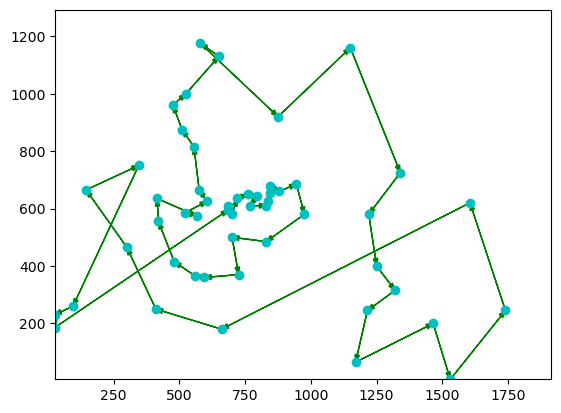

In [8]:
berlin52_tsp_1.plot(sa_1.s_best)